In [31]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl

In [32]:
%matplotlib inline

In [33]:
path = r'C:\Users\stefa\OneDrive\Career Foundry\Chase Bank Analysis'

In [34]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Database.csv'))

In [35]:
df.shape

(3783, 22)

In [36]:
df.head()

,Unnamed: 0,Institution Name,Main Office,Branch Name,Branch Number,Established Date,Acquired Date,Street Address,City,County,...,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits,2016 Median Annual Income
0,0,JPMorgan Chase Bank,0,Avenue U and East 17th St Branch,501,1/1/1900,6/20/1992,1722 Avenue U,Brooklyn,Kings,...,40.59911,-73.95374,257757.0,256109.0,269664.0,393884.0,410870.0,432799.0,480204,61437
1,1,JPMorgan Chase Bank,0,Broadway and 96th Street Branch,512,1/1/1900,6/20/1992,"2551 Broadway, 96th Street",New York City,New York,...,40.79445,-73.97206,327054.0,336573.0,354604.0,385553.0,422699.0,441168.0,474228,61437
2,2,JPMorgan Chase Bank,0,Suffern Branch,3859,11/1/1901,10/1/2006,67 Lafayette Street,Suffern,Rockland,...,41.11541,-74.15134,38610.0,41017.0,44148.0,50997.0,58002.0,61939.0,65483,61437
3,3,JPMorgan Chase Bank,0,Grand Street Branch,509,1/1/1902,6/20/1992,231 Grand Street,New York City,New York,...,40.71853,-73.99513,110712.0,127369.0,161513.0,197445.0,219289.0,245988.0,281266,61437
4,4,JPMorgan Chase Bank,0,Ninth Street Branch,498,12/29/1902,6/20/1992,444 5th Avenue,Brooklyn,Kings,...,40.66985,-73.98073,143163.0,161085.0,189245.0,205912.0,235212.0,248736.0,281082,61437


In [37]:
df = df.drop(columns = ['Institution Name'])

In [38]:
df = df.drop(columns = ['Main Office'])

In [39]:
df = df.drop(columns = ['Branch Name'])

In [40]:
df = df.drop(columns = ['Established Date'])

In [41]:
df = df.drop(columns = ['Acquired Date'])

In [42]:
df = df.drop(columns = ['Street Address'])

In [43]:
df = df.drop(columns = ['City'])

In [44]:
df = df.drop(columns = ['County'])

In [45]:
df = df.drop(columns = ['State'])

In [46]:
df = df.drop(columns = ['Zipcode'])

In [47]:
df

,Unnamed: 0,Branch Number,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits,2016 Median Annual Income
0,0,501,40.59911,-73.95374,257757.0,256109.0,269664.0,393884.0,410870.0,432799.0,480204,61437
1,1,512,40.79445,-73.97206,327054.0,336573.0,354604.0,385553.0,422699.0,441168.0,474228,61437
2,2,3859,41.11541,-74.15134,38610.0,41017.0,44148.0,50997.0,58002.0,61939.0,65483,61437
3,3,509,40.71853,-73.99513,110712.0,127369.0,161513.0,197445.0,219289.0,245988.0,281266,61437
4,4,498,40.66985,-73.98073,143163.0,161085.0,189245.0,205912.0,235212.0,248736.0,281082,61437
...,...,...,...,...,...,...,...,...,...,...,...,...
3778,3791,4408,33.84964,-84.37680,0.0,0.0,0.0,0.0,0.0,0.0,0,53527
3779,3792,5534,33.85553,-84.31256,7353.0,9506.0,11784.0,14721.0,17628.0,19531.0,24122,53527
3780,3793,5538,33.92131,-84.01652,11031.0,13266.0,15776.0,16844.0,18553.0,21373.0,26737,53527
3781,3794,6592,33.88949,-84.31029,13559.0,13450.0,18043.0,19028.0,22416.0,25138.0,28075,53527


### Elbow Technique

In [48]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [49]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

[-7.371150009954448e+16,
 -9025978386071458.0,
 -3988751816490017.0,
 -2313518853388500.5,
 -1169476973878106.2,
 -470135177036664.1,
 -319129362730052.25,
 -229607067076213.3,
 -173868787102257.22]

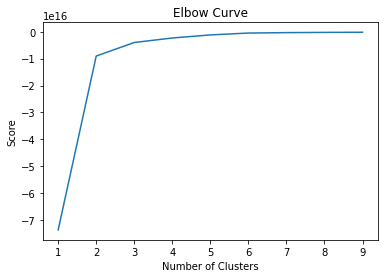

In [50]:
# Plotting the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### According to the graph; there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is two.

### K-means Algorithm

In [51]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 2, n_jobs = -1) 

In [52]:
# Fitting the k-means object to the data.

kmeans.fit(df)

C:\Users\stefa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=2, n_jobs=-1)

In [53]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\stefa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [54]:
df.head()

,Unnamed: 0,Branch Number,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits,2016 Median Annual Income,clusters
0,0,501,40.59911,-73.95374,257757.0,256109.0,269664.0,393884.0,410870.0,432799.0,480204,61437,0
1,1,512,40.79445,-73.97206,327054.0,336573.0,354604.0,385553.0,422699.0,441168.0,474228,61437,0
2,2,3859,41.11541,-74.15134,38610.0,41017.0,44148.0,50997.0,58002.0,61939.0,65483,61437,0
3,3,509,40.71853,-73.99513,110712.0,127369.0,161513.0,197445.0,219289.0,245988.0,281266,61437,0
4,4,498,40.66985,-73.98073,143163.0,161085.0,189245.0,205912.0,235212.0,248736.0,281082,61437,0


In [55]:
df['clusters'].value_counts()

0    3780
1       3
Name: clusters, dtype: int64

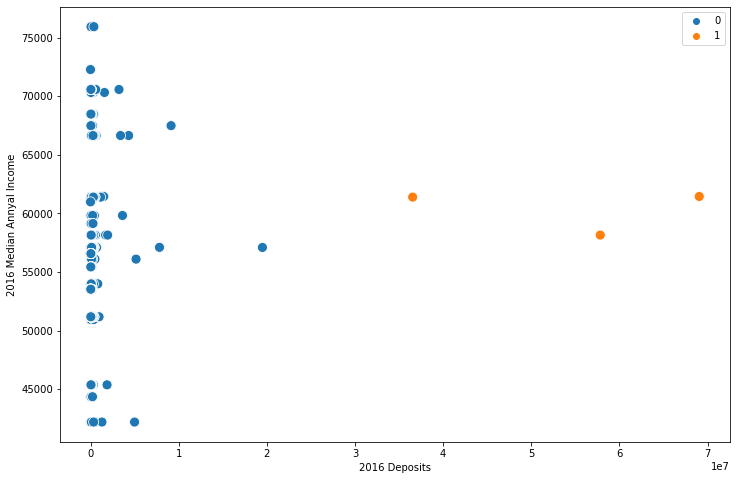

In [56]:
# Plotting the clusters for the "2016 Deposits" and "2016 Median Annual Income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['2016 Deposits'], y=df['2016 Median Annual Income'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('2016 Deposits') 
plt.ylabel('2016 Median Annyal Income')
plt.show()

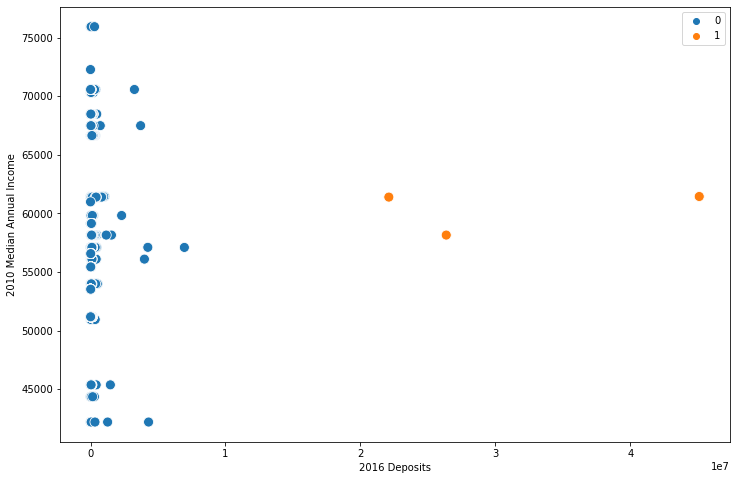

In [61]:
# Plotting the clusters for the "2016 Deposits" and "2010 Median Annual Income" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['2010 Deposits'], y=df['2016 Median Annual Income'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('2016 Deposits') 
plt.ylabel('2010 Median Annual Income')
plt.show()

Interestingly, the clusters make sense and there are 3 deposits well bellow 2 million. Although these could be used as outliers they were kept in the data to avoid biases. Further evidence seen below without these outliers.

In [58]:
df_sample = df[df['2016 Deposits'] <=3500000] 

In [62]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [63]:
score = [kmeans[i].fit(df_sample).score(df_sample) for i in range(len(kmeans))] 

score

[-448306217279782.5,
 -276761418012397.53,
 -164765010152196.12,
 -117248980355877.39,
 -82928024815675.02,
 -67734939001931.766,
 -55335273669352.35,
 -43571762944481.22,
 -33879406103105.117]

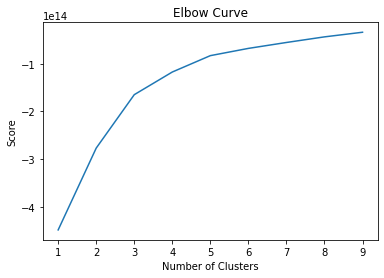

In [64]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [65]:
kmeans = KMeans(n_clusters = 5, n_jobs = -1) 

In [67]:
kmeans.fit(df_sample)

C:\Users\stefa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=5, n_jobs=-1)

In [68]:
df_sample['clusters'] = kmeans.fit_predict(df_sample)

C:\Users\stefa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-68-15320f5a19bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sample['clusters'] = kmeans.fit_predict(df_sample)


In [69]:
df_sample.head()

,Unnamed: 0,Branch Number,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits,2016 Median Annual Income,clusters
0,0,501,40.59911,-73.95374,257757.0,256109.0,269664.0,393884.0,410870.0,432799.0,480204,61437,1
1,1,512,40.79445,-73.97206,327054.0,336573.0,354604.0,385553.0,422699.0,441168.0,474228,61437,1
2,2,3859,41.11541,-74.15134,38610.0,41017.0,44148.0,50997.0,58002.0,61939.0,65483,61437,0
3,3,509,40.71853,-73.99513,110712.0,127369.0,161513.0,197445.0,219289.0,245988.0,281266,61437,3
4,4,498,40.66985,-73.98073,143163.0,161085.0,189245.0,205912.0,235212.0,248736.0,281082,61437,3


In [70]:
df_sample['clusters'].value_counts()

0    2713
3     911
1     138
2      10
4       1
Name: clusters, dtype: int64

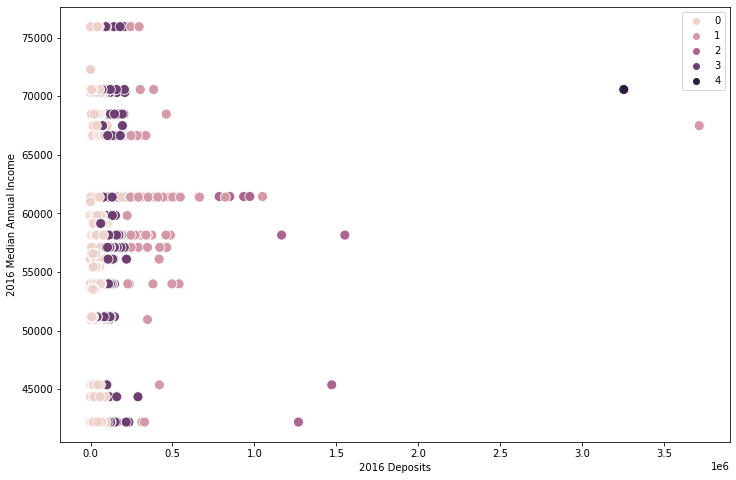

In [74]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sample['2010 Deposits'], y=df_sample['2016 Median Annual Income'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('2016 Deposits') 
plt.ylabel('2016 Median Annual Income')
plt.show()

This chart gives us a much better view into the clusters formed without the outliers

### Descriptive Statistics for Clusters

In [73]:
df.loc[df['clusters'] == 1, 'cluster'] = 'orange'
df.loc[df['clusters'] == 0, 'cluster'] = 'blue'

In [75]:
df.groupby('cluster').agg({'2010 Deposits':['mean', 'median'], 
                         '2016 Deposits':['mean', 'median'], 
                         '2016 Median Annual Income':['mean', 'median']})

2010 Deposits             2016 Deposits            \
                 mean      median          mean    median   
cluster                                                     
blue     8.018398e+04     49506.5  1.311629e+05     81239   
orange   3.118552e+07  26356388.0  5.446813e+07  57820585   

        2016 Median Annual Income         
                             mean median  
cluster                                   
blue                 59780.076984  59817  
orange               60323.000000  61386

And using the clusters without the outliers we get the following...

In [76]:
df_sample.loc[df_sample['clusters'] == 0, 'cluster'] = 'tan'
df_sample.loc[df_sample['clusters'] == 1, 'cluster'] = 'pink'
df_sample.loc[df_sample['clusters'] == 2, 'cluster'] = 'purple'
df_sample.loc[df_sample['clusters'] == 3, 'cluster'] = 'dark purple'
df_sample.loc[df_sample['clusters'] == 4, 'cluster'] = 'violet'

C:\Users\stefa\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\stefa\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\stefa\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [77]:
df_sample.groupby('cluster').agg({'2010 Deposits':['mean', 'median'], 
                         '2016 Deposits':['mean', 'median'], 
                         '2016 Median Annual Income':['mean', 'median']})

2010 Deposits            2016 Deposits           \
                     mean     median          mean   median   
cluster                                                       
dark purple  1.240642e+05   115827.0  1.974527e+05   185204   
pink         3.468641e+05   286639.0  4.750993e+05   440501   
purple       9.207377e+05   952792.0  1.702703e+06  1539613   
tan          3.938691e+04    36649.0  6.469599e+04    61344   
violet       3.252426e+06  3252426.0  3.230688e+06  3230688   

            2016 Median Annual Income         
                                 mean median  
cluster                                       
dark purple              61474.996707  61437  
pink                     60811.760870  61386  
purple                   58655.200000  61437  
tan                      59163.071139  58146  
violet                   70566.000000  70566